### 1. Write about the p-value, test statistic, critical values in detail and how are they important to determine stationarity of a dataset. 

P-value

In statistics, the p-value is the probability of obtaining results as extreme as the observed results of a statistical 
hypothesis test, assuming that the null hypothesis is correct. 
The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the 
null hypothesis would be rejected.A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis

Test statistic:

The test statistic compares your data with what is expected under the null hypothesis. The test statistic is used to 
calculate the p-value. A test statistic measures the degree of agreement between a sample of data and the null hypothesis.

Critical Value:

In hypothesis testing, a critical value is a point on the test distribution that is compared to the test statistic
to determine whether to reject the null hypothesis. If the absolute value of your test statistic is greater than 
the critical value, you can declare statistical significance and reject the null hypothesis.

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Test for stationarity:

If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).


### 2. Understand the ADF test mathematically. 

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary 
or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series

The ADF test belongs to a category of tests called ‘Unit Root Test’, which is the proper method for testing the 
stationarity of a time series

Unit root is a characteristic of a time series that makes it non-stationary,A unit root is said to exist
in a time series of the value of alpha = 1 in the below equation.
  
yt = αYt-1 + βXe + e

where, Yt is the value of the time series at time ‘t’ and Xe is an exogenous variable 
(a separate explanatory variable, which is also a time series)
 
A Dickey-Fuller test is a unit root test that tests the null hypothesis that α=1 in the following model equation.
alpha is the coefficient of the first lag on Y.

Null Hypothesis (H0): alpha=1

yt = c + βt + αyt-1 + ϕΔyt-1 + et

y(t-1) = lag 1 of time series
delta Y(t-1) = first difference of the series at time (t-1)

Fundamentally, it has a similar null hypothesis as the unit root test.
That is, the coefficient of Y(t-1) is 1, implying the presence of a unit root. 
If not rejected, the series is taken to be non-stationary.

The ADF test expands the Dickey-Fuller test equation to include high order regressive process in the model.

yt = c + βt + αyt-1 + ϕΔyt-1 + ϕΔyt-2.. + ϕΔyt-p + et

If you notice, we have only added more differencing terms, while the rest of the equation remains the same. 
This adds more thoroughness to the test.


### 3. Write about steps that can be taken to make a time-series stationary. 

Time series datasets may contain trends and seasonality, which may need to be removed prior to modeling.

Trends can result in a varying mean over time, whereas seasonality can result in a changing variance over time, both which define a time series as being non-stationary. Stationary datasets are those that have a stable mean and variance, and are in turn much easier to model.

The two most common ways to make a non-stationary time series curve stationary are:

Differencing

Transforming

Differencing:
In order to make your series stationary, you take a difference between the data points. So let us say, your original time series was:

X1, X2, X3,...........Xn
You series with difference of degree 1 becomes:

(X2 - X1, X3 - X2, X4 - X3,.......Xn - X(n-1)

Once, you take the difference, plot the series and see if there is any improvement in the the acf curve. If not, you can try a second or even a third order differencing. Remember, the more you difference, the more complicated your analysis is becoming

Transformation

If you can not make a time series stationary, you can try out transforming the variables. Log transform is probably the most commonly used transformation, if you are seeing a diverging time series.
However, it is normally suggested that you use transformation only in case differencing is not working


### 4. Perform the analysis done in this week on the mean temperature dataset. Also, write in detail about the insights you found while doing the analysis. 


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams["figure.figsize"] = [16,9]
from statistics import *
import seaborn as sns
sns.set()

In [6]:
data = pd.read_csv(r"C:\Users\Madhukar\Documents\Mechine_learning\Projects\Time_series_Arima\testset.csv")

In [7]:
#using interpolate method to impute the missing values
data['Temperature'] = data.Temperature.interpolate(method='linear')

In [8]:
#datetime format
data['datetime'] = pd.to_datetime(data['datetime'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))

In [9]:
data = data.set_index('datetime',drop=True)
data.index.name = 'datetime'

In [10]:
# using IQR method to display outlier data,IQR is the first quartile subtracted from the third quartile
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Temperature    13.0
dtype: float64


In [11]:
# removing the outlayers
data_out= data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(100986, 1)

In [12]:
#excluding the missing and retaining years of 12 months data
data = data_out['2001':'2016']
data.shape

(76507, 1)

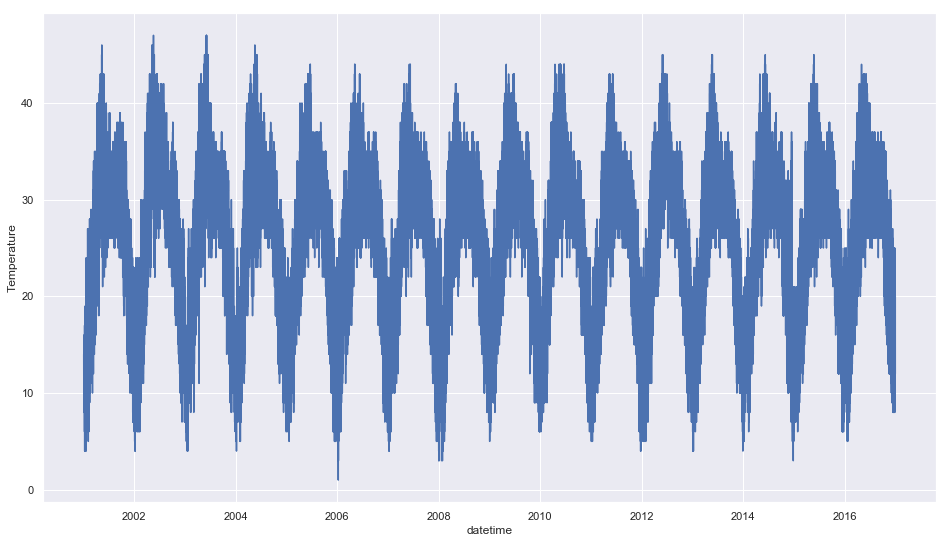

In [23]:
#post excluding the outlayers and missing values.
plt.xlabel('datetime')
plt.ylabel('Temperature')
plt.plot(data)

In [76]:
#data1=data.reset_index()
#data1.head()

In [77]:
data1=data
data1['datetime'] = pd.to_datetime(data1['datetime'])

In [78]:
ts = pd.Series(data1['Temperature'].values, index=data1['datetime'])

In [80]:
ts.head()

datetime
2001-01-01 00:30:00    14.0
2001-01-01 01:30:00    13.0
2001-01-01 02:30:00    13.0
2001-01-01 03:30:00    13.0
2001-01-01 04:30:00    13.0
dtype: float64

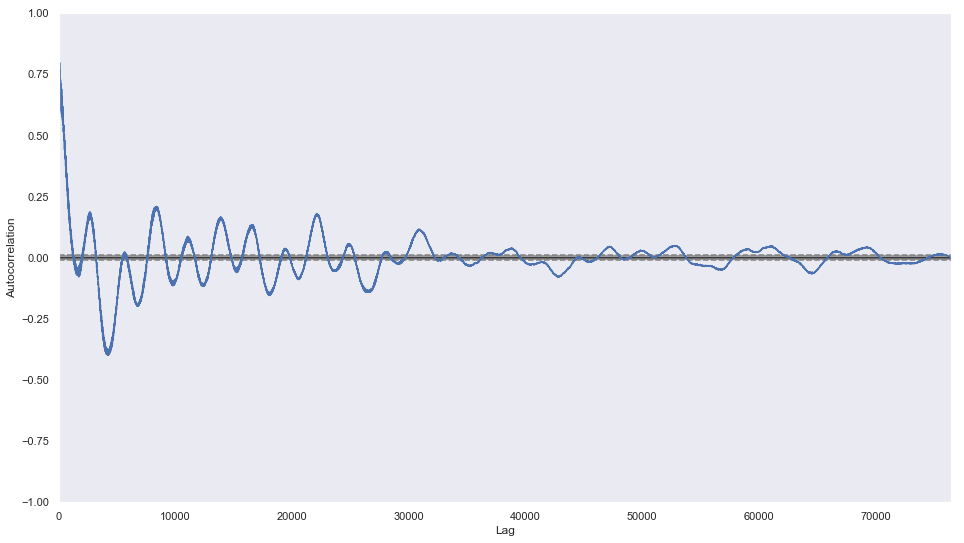

In [81]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts)
plt.show()

### From the above chart we have both partially weak positive and negitive corelation between the variables reflecting no trend but some initial seasonality.

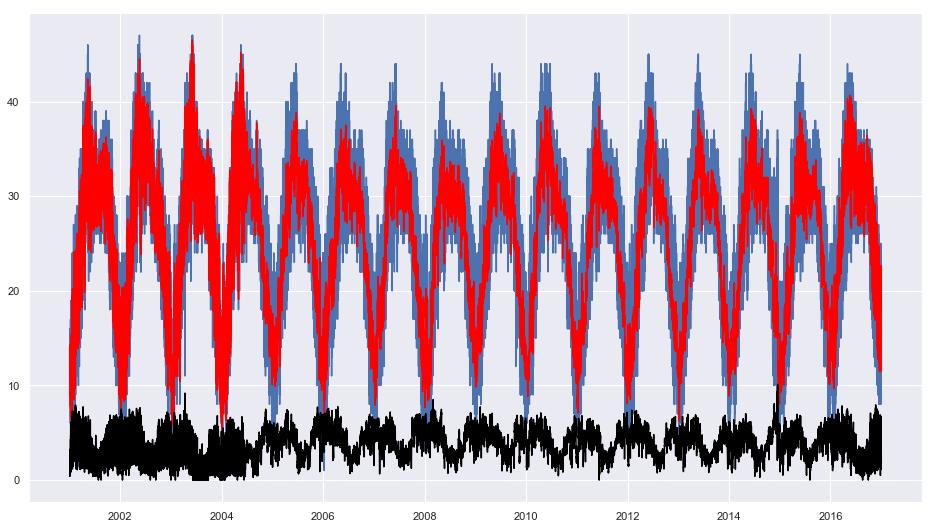

In [82]:
movingaverage=ts.rolling(window=12).mean()
movingstd=ts.rolling(window=12).std()
plt.plot(ts)
plt.plot(movingaverage, color='red')
plt.plot(movingstd, color='black')

H0 or null hypothesis: The time series is stationary

H1 or alternative hypothesis: The time series is not stationary

From the above chart standard deviation line is stationary and moving average line looks like stationary, will confirm with ADF testing.

In [83]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(tss):
    
    # Determing rolling statistics
    roll_mean = tss.rolling(window=12).mean()
    movingstd= tss.rolling(window=12).std()
    # Plot rolling statistics:
    plt.plot(tss, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.plot(movingstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Std')
    plt.show(block=False)
    
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(tss)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

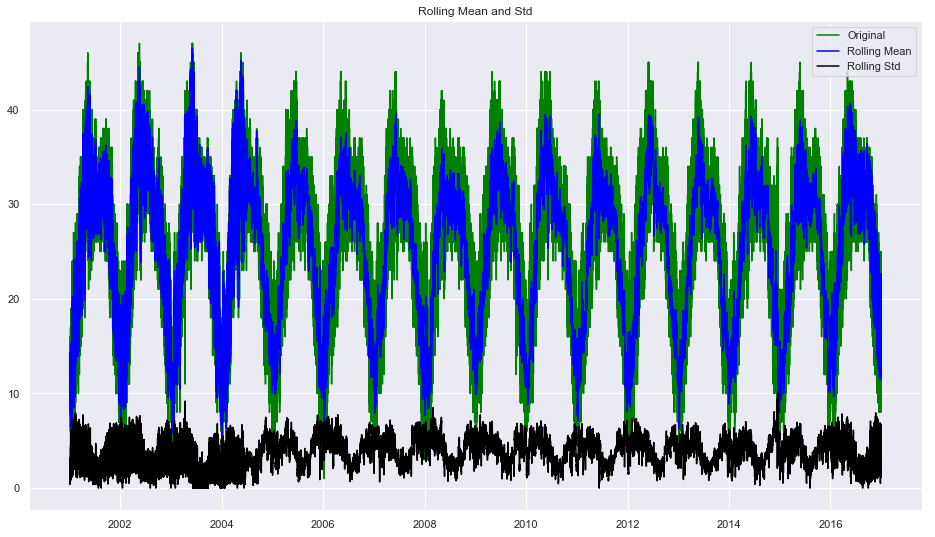

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-6.830511945554582, 1.898995729719106e-09, 64, 76442, {'1%': -3.4304355487769147, '5%': -2.8615778110906995, '10%': -2.5667901255428536}, 314999.5058241563)
df_output: 
 Test Statistic                -6.830512e+00
p-value                        1.898996e-09
#Lags Used                     6.400000e+01
Number of Observations Used    7.644200e+04
dtype: float64
Test Statistic                -6.830512e+00
p-value                        1.898996e-09
#Lags Used                     6.400000e+01
Number of Observations Used    7.644200e+04
Critical Value (1%)           -3.430436e+00
Critical Value (5%)           -2.861578e+00
Critical Value (10%)          -2.566790e+00
dtype: float64


In [84]:
stationarity_check(ts)

### From the above ADF test, p< 0.05 implies that the series does not have a unit root and is stationary and test statistics < critical values of confidence levels, so we reject null hypothesis and the series is stationary. 